In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import tree
from sklearn import preprocessing
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
data = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/15_RF/Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='Education', ylabel='Density'>

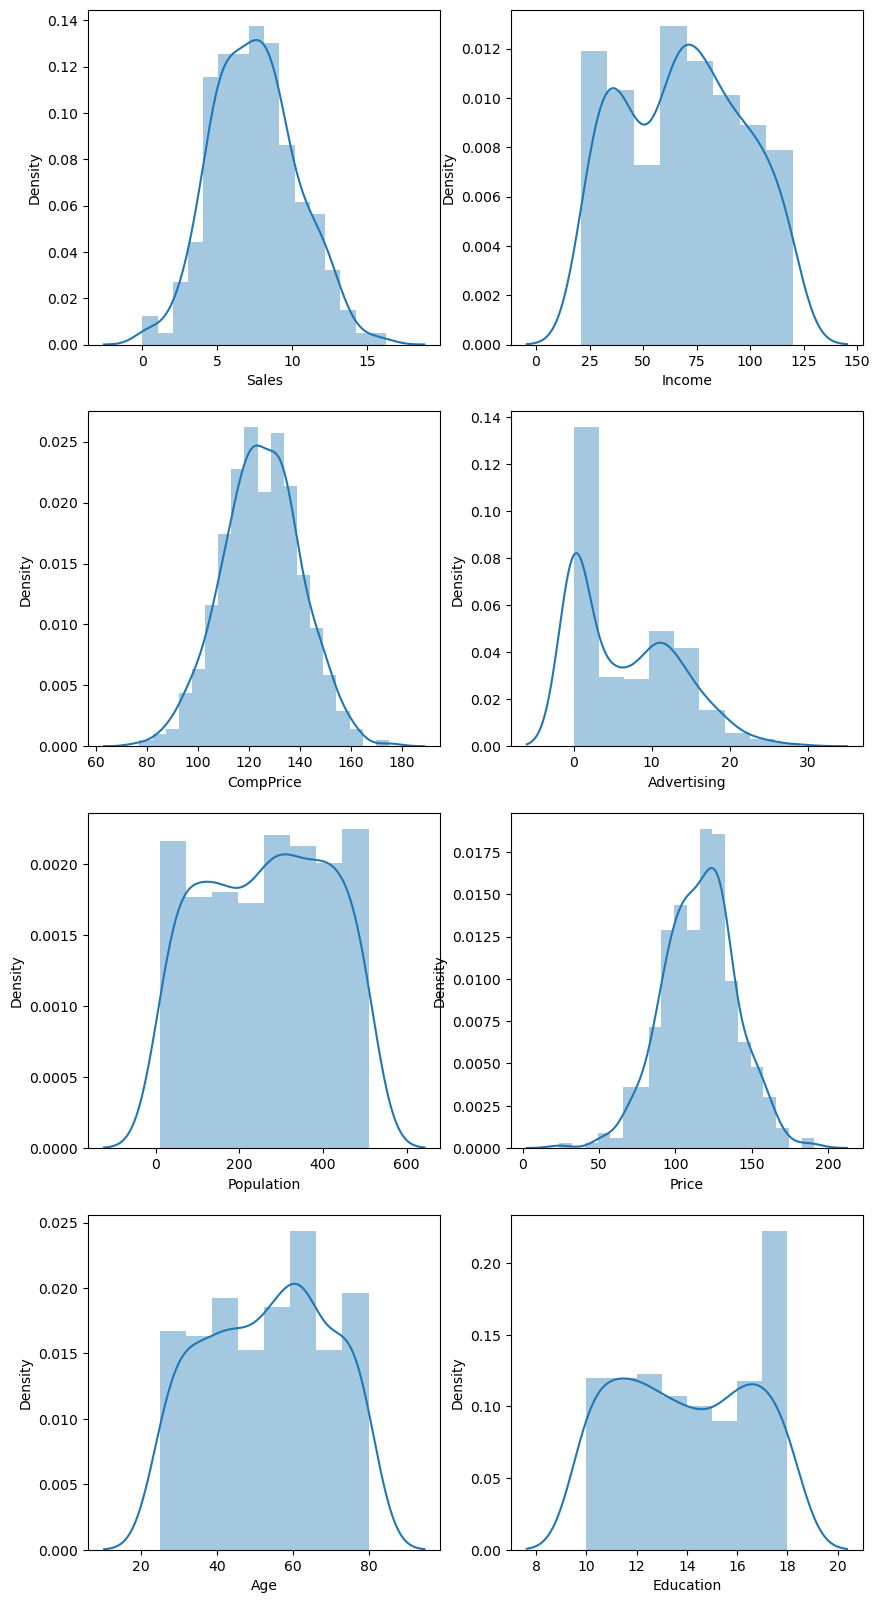

In [6]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
sns.distplot(data.Sales,ax=axs[0,0])
sns.distplot(data.Income,ax=axs[0,1])
sns.distplot(data.CompPrice,ax=axs[1,0])
sns.distplot(data.Advertising,ax=axs[1,1])
sns.distplot(data.Population,ax=axs[2,0])
sns.distplot(data.Price,ax=axs[2,1])
sns.distplot(data.Age,ax=axs[3,0])
sns.distplot(data.Education,ax=axs[3,1])

Text(0.5, 1.0, 'Education')

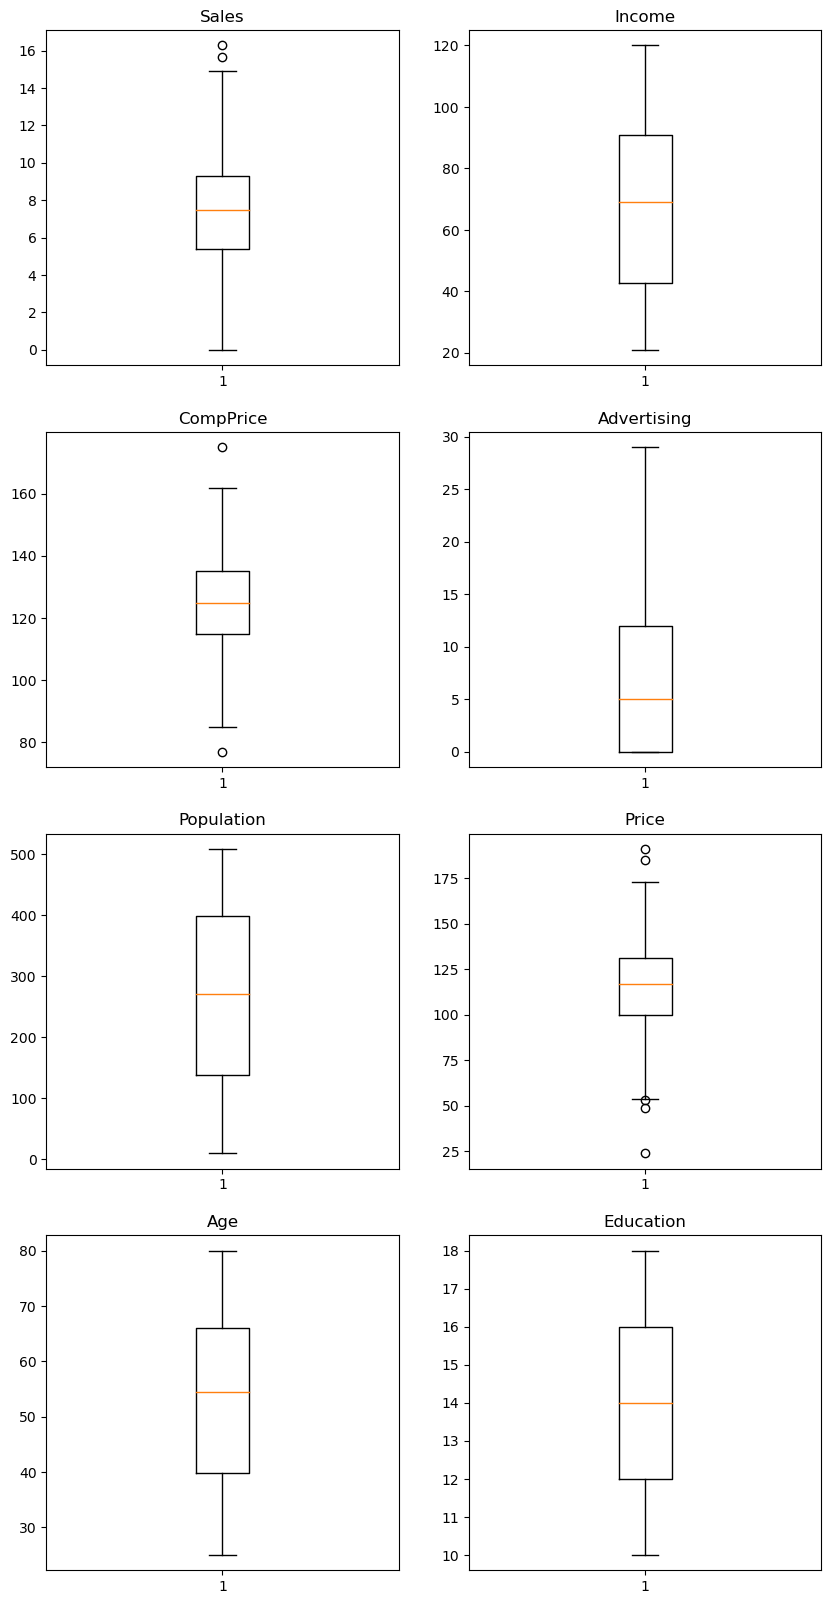

In [7]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
axs[0,0].boxplot(data.Sales)
axs[0,1].boxplot(data.Income)
axs[1,0].boxplot(data.CompPrice)
axs[1,1].boxplot(data.Advertising)
axs[2,0].boxplot(data.Population)
axs[2,1].boxplot(data.Price)
axs[3,0].boxplot(data.Age)
axs[3,1].boxplot(data.Education)
axs[0,0].set_title("Sales")
axs[0,1].set_title("Income")
axs[1,0].set_title("CompPrice")
axs[1,1].set_title("Advertising")
axs[2,0].set_title("Population")
axs[2,1].set_title("Price")
axs[3,0].set_title("Age")
axs[3,1].set_title("Education")

In [8]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [9]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [11]:
def ROC_AUC(y_test,y_pred_prob):
    classes = "0 vs 1"

    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linestyle='--', label='%s (AUC=%0.2f)' % (classes, roc_auc))

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

   
    auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
    print("AUC_Score: ",auc_score)

In [12]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])

data['Sales_N']='low'
data.loc[data['Sales']>8,'Sales_N']='risky'
dataset=data.drop(['Sales'],axis=1)

X=dataset.iloc[:,: -1]# independant variables
y1 = dataset.iloc[:,-1] #dependant variable
# print(y2)
y= label_encoder.fit_transform(y1)
# print(X.head())
# # print(y1.head())
# print(y2)
# # y1.value_counts()


Accuracy of random forest classifier on training set: 1.0000
Accuracy of random forest classifier on test set: 0.7625
Mean accuracy of kfold cross validation:  0.8225


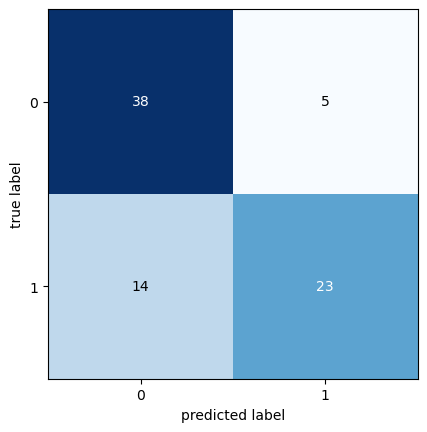


Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.78
Macro Recall: 0.75
Macro F1-score: 0.75

Weighted Precision: 0.77
Weighted Recall: 0.76
Weighted F1-score: 0.76

Classification Report

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        43
           1       0.82      0.62      0.71        37

    accuracy                           0.76        80
   macro avg       0.78      0.75      0.75        80
weighted avg       0.77      0.76      0.76        80



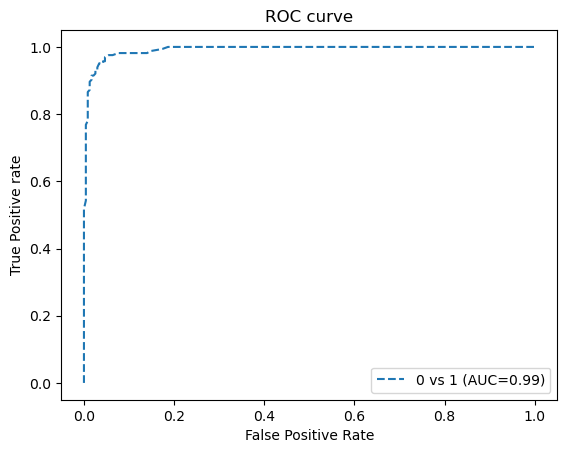

AUC_Score:  0.9919775733774288


In [13]:
def model(X,y): 
  
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    print('Accuracy of random forest classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of random forest classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
    y_pred_prob=clf.predict_proba(X)
    
    ## kfold cross validation
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    results = cross_val_score(clf, X, y, cv=kfold)
    print("Mean accuracy of kfold cross validation: ",results.mean())
    

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y,y_pred_prob)
       
    
    
    
model(X,y)



Accuracy of random forest classifier on training set: 1.0000
Accuracy of random forest classifier on test set: 0.7750


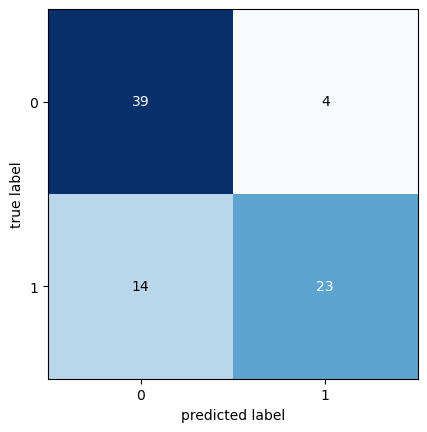


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.79
Macro Recall: 0.76
Macro F1-score: 0.77

Weighted Precision: 0.79
Weighted Recall: 0.78
Weighted F1-score: 0.77

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        43
           1       0.85      0.62      0.72        37

    accuracy                           0.78        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.79      0.78      0.77        80



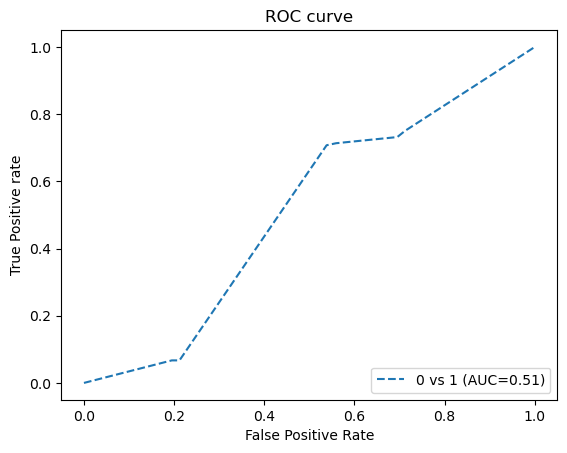

AUC_Score:  0.5117042166184373


In [14]:
def model_scaling(X,y):
       
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
      
    from sklearn.preprocessing import StandardScaler
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)

    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    print('Accuracy of random forest classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of random forest classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
    y_pred_prob=clf.predict_proba(X)
    

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y,y_pred_prob)
    
    
model_scaling(X,y)

In [15]:
##Hypertuning parameters

#train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

#List Hyperparameters that we want to tune.

n_estimators = [800,1000]
max_features = list(range(2,9))
#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features)
rf = RandomForestClassifier()
#Use GridSearch
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(rf, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print(best_model.best_params_,best_model.best_score_)



{'max_features': 3, 'n_estimators': 800} 0.815625


## After hypertuning the model is giving best accuracy. Hence this model can be used for sales classification.
